## Case Study - Shoes price prediction

### Objective:

Predicting shoes price for the customers of Zshoes.

### Problem Statement:

Zshoes.com is one of the famous shoe manufacturers of India and has business in
almost every country in Asia and Europe. They are one of the best choices of all the
athletics and they make the best shoes for running. Due to pandemic, they are facing a
loss as Zshoes are a bit expensive. They want to know the correct price of all types of
shoes that they are manufacturing so that they won’t face any loss and at the same
time customers also buy the shoes. As a machine learning engineer, we have to build a
shoe-price prediction app that can predict the correct shoe price by taking inputs like
freight_value,payment_type, etc.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import scipy as sp
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels
import statsmodels.api as sm

#### Importing Data Set

In [159]:
df = pd.read_csv('product_data.csv')

In [160]:
df.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,58.90,13.29,1,1,2,72.19
1,1,239.90,19.93,1,1,3,259.83
2,1,199.00,17.87,1,1,5,216.87
3,1,12.99,12.79,1,1,2,25.78
4,1,199.90,18.14,1,1,3,218.04


In [161]:
df.shape

(101335, 7)

In [162]:
df.dtypes

order_item_id             int64
price                   float64
freight_value           float64
payment_sequential        int64
payment_type              int64
payment_installments      int64
payment_value           float64
dtype: object

Payment Type is categorical feature. We need to convert it.

In [163]:
df['payment_type'] = df['payment_type'].astype('object')

Lets check the data types again.

In [164]:
df.dtypes

order_item_id             int64
price                   float64
freight_value           float64
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

Order item Id is insignificant. Let's drop it.

In [165]:
df = df.drop('order_item_id', axis = 1)

#### Let's see if we have any missing values.

In [166]:
Total = df.isnull().sum().sort_values(ascending=False)  
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
payment_value,0,0.0
payment_installments,0,0.0
payment_type,0,0.0
payment_sequential,0,0.0
freight_value,0,0.0
price,0,0.0


There are no missing values!!!

### Split the dependent and independent variables

In [167]:

df_target = df['price']
df_feature = df.drop('price', axis = 1)

### Separating numerical and categorical variables.

In [168]:

df_num = df_feature.select_dtypes(include = [np.number])
df_num.columns

Index(['freight_value', 'payment_sequential', 'payment_installments',
       'payment_value'],
      dtype='object')

In [169]:
df_cat = df_feature.select_dtypes(include = [np.object])
df_cat.columns

Index(['payment_type'], dtype='object')

#### Dummy encoding of Cateogrical Variables

In [170]:
#dummy encoding
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

### Scaling of Numerical Variables

In [171]:
#scaling numerical data
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numeric variables
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

# standardize the target variable explicitly and store it in a new variable 'y'
y = (df_target - df_target.mean()) / df_target.std()

### Concatenate scaled numerical and dummy encoded categorical variables.

In [172]:
# Concatenate scaled numerical and dummy encoded categorical variables.¶
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,freight_value,payment_sequential,payment_installments,payment_value,payment_type_2,payment_type_3,payment_type_4
0,-0.477304,-0.129873,-0.266094,-0.417421,0,0,0
1,0.639938,-0.129873,0.130054,1.090727,0,0,0
2,0.293324,-0.129873,0.922350,0.745438,0,0,0
3,-0.561433,-0.129873,-0.266094,-0.790440,0,0,0
4,0.338754,-0.129873,0.130054,0.754842,0,0,0


### Data Visualization

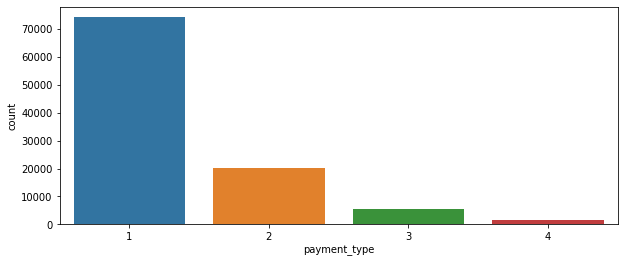

In [173]:
plt.figure(figsize=(10,4))
sns.countplot(x = df_cat['payment_type'])
plt.show()

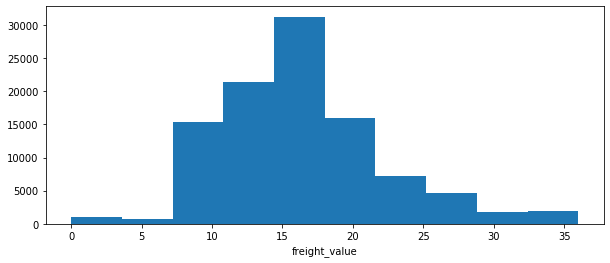

In [174]:
plt.figure(figsize=(10,4))
plt.hist(data=df, x="freight_value")
plt.xlabel('freight_value')
plt.show()

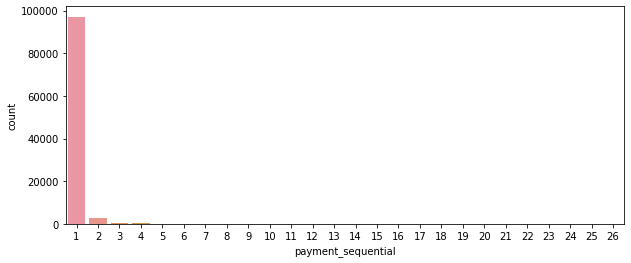

In [175]:
plt.figure(figsize=(10,4))
sns.countplot(df["payment_sequential"])

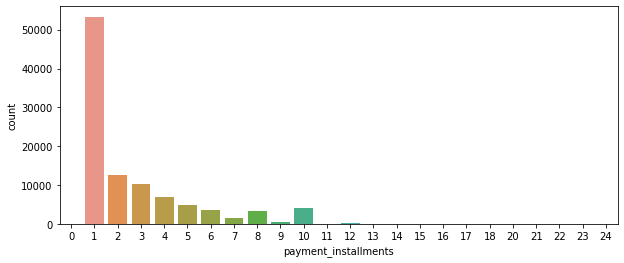

In [176]:
plt.figure(figsize=(10,4))
sns.countplot(df["payment_installments"])

### Correlation between features

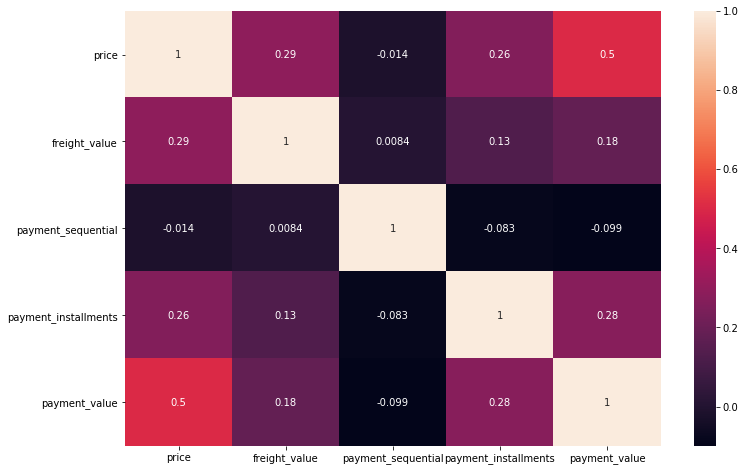

In [177]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

### Train Test Split

In [178]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)


print('X_train', X_train.shape)
print('y_train', y_train.shape)


print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (70934, 7)
y_train (70934,)
X_test (30401, 7)
y_test (30401,)


### Benchmarking

The initial benchmarking will be made by looking at three different metrics used for estimating errors, as well as one statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. These are:

Error Metrics:

Mean Absolute Error (MAE)

Mean Sqared Error (MSE)

Root Mean Squared Error (RMSE)

Model Valuation Metric (robustness of the model):

R-squared (R^2)

### Linear Regression

In [179]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [180]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  0.6217387362333874
MSE:  0.687907655412331
RMSE:  0.8294019866218859
R^2: 0.31120461678083444


### KNN Regressor

In [181]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [182]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  0.30508192875621354
MSE:  0.33471818887380583
RMSE:  0.5785483461853519
R^2: 0.6648498655861514


### Decision Tree

In [183]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [184]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  0.14995950424465554
MSE:  0.2411472244100878
RMSE:  0.491067433668827
R^2: 0.7585415810640692


### Random Forest

In [185]:
#Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [186]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  0.17219838414951094
MSE:  0.15286178779230117
RMSE:  0.39097543118756345
R^2: 0.8469409478531622


### XGBoost

In [187]:
xg = XGBRegressor()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [188]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  0.2938279340419469
MSE:  0.250044067944369
RMSE:  0.5000440660025565
R^2: 0.749633256373362


### Conclusion 

In [ ]:
Random Forest is giving 